# Evaluate Decima's ability to predict cell type-specific expression patterns of held-out genes

In [1]:
import numpy as np
import pandas as pd
import anndata
import os, sys

sys.path.append('/code/decima/src/decima')

from evaluate import compare_marker_zscores, compute_marker_metrics
from grelu.visualize import plot_distribution
from plotnine import *

%matplotlib inline

/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Paths

In [2]:
save_dir="/gstore/data/resbioai/grelu/decima/20240823"
matrix_file = os.path.join(save_dir, "data.h5ad")

## Load data

In [3]:
ad = anndata.read_h5ad(matrix_file)
ad = ad[:, ad.var.dataset == "test"].copy()
ad.shape

(8856, 1811)

## Compute z-scores per cell type

In [4]:
marker_zscores = compare_marker_zscores(ad, key='cell_type')

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 201/201 [00:00<00:00, 2159.82it/s]


## Compute metrics for marker prediction

In [5]:
marker_metrics = compute_marker_metrics(marker_zscores, key='cell_type')
print(len(marker_metrics))

201


In [6]:
marker_metrics[['pearson', 'auprc', 'auroc']].aggregate(['mean', 'median']) 

,pearson,auprc,auroc
mean,0.599753,0.362821,0.822489
median,0.608238,0.352595,0.833246


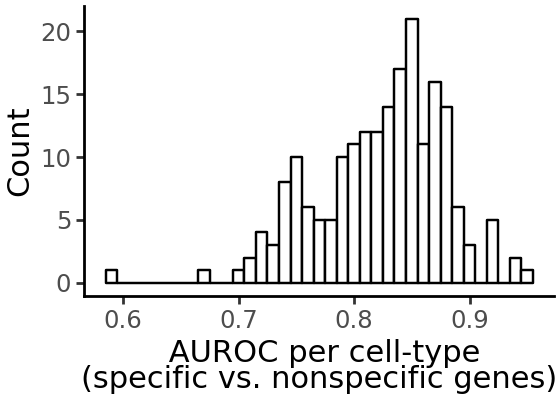

In [7]:
(
    plot_distribution(marker_metrics['auroc'], method="histogram", 
                      binwidth=0.01, fill='white', color='black', bins=50) 
    +theme(figure_size=(2.8,2)) 
    + xlab("         AUROC per cell-type\n(specific vs. nonspecific genes)")
    + ylab("Count")
)